# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests

# Import API key
from api_keys import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

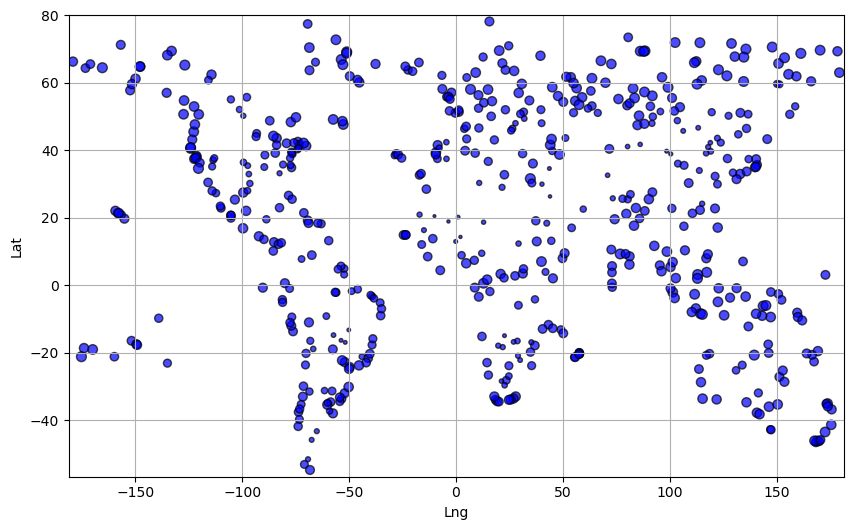

In [3]:
%%capture --no-display

import matplotlib.pyplot as plt

def create_city_map(city_data_df):
    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Get the data for plotting
    Lat = city_data_df['Lat']
    Lng = city_data_df['Lng']
    Humidity = city_data_df['Humidity']

    # Create a scatter plot with size based on humidity
    plt.scatter(Lng, Lat, s=Humidity*0.5, color='blue', alpha=0.7, edgecolors='black', linewidth=1)

    # Set the map boundaries
    plt.xlim(city_data_df['Lng'].min() - 2, city_data_df['Lng'].max() + 2)
    plt.ylim(city_data_df['Lat'].min() - 2, city_data_df['Lat'].max() + 2)

    # Add labels and grid
    plt.xlabel('Lng')
    plt.ylabel('Lat')
    plt.grid(True)

    # Show the map
    plt.show()

# Create a city map
create_city_map(city_data_df)


### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [4]:
import pandas as pd

#Define my criteria for the ideal weather conditions
ideal_conditions = {
    'Max Temp': 25,
    'Humidity': 50,
    'Wind Speed': 5
}

#Go through dataframe based on the above criteria
filtered_df = city_data_df[
    (city_data_df['Max Temp']<= ideal_conditions['Max Temp']) &
    (city_data_df['Humidity']<= ideal_conditions['Humidity']) &
    (city_data_df['Wind Speed']<= ideal_conditions['Wind Speed'])
]

#Drop any rows with null values from the filtered dataframe
filtered_df = filtered_df.dropna()

#Show the sample data from the changes above
print(filtered_df.sample(10))

     City_ID          City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
560      560       changli  39.7042  119.1506      9.17        33           0   
305      305       kingman  35.1894 -114.0530     20.07        49           5   
90        90  saint george  37.1041 -113.5841     13.33        44           0   
359      359         korla  41.7597   86.1469     13.51        19          27   
174      174         avera  33.1940  -82.5271     12.53        26           0   
101      101         heihe  50.2441  127.4902      2.32        49           3   
442      442       tieling  42.2931  123.8414      3.98        50           0   
476      476       chifeng  42.2683  118.9636      5.09        20           0   
522      522       xuchang  34.0167  113.8167     12.46        35           0   
537      537      tongliao  43.6125  122.2653      3.54        35           0   

     Wind Speed Country        Date  
560        2.41      CN  1666108557  
305        4.02      US  1666108

### Step 3: Create a new DataFrame called `hotel_df`.

In [20]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
import pandas as pd

#Create the new dataframe
hotel_df = city_data_df.copy()[['City', 'Country', 'Lat', 'Lng', 'Humidity']]

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df['Hotel Name'] = pd.NA

# Display sample data
print(hotel_df.sample(10))


               City Country      Lat       Lng  Humidity Hotel Name
221   pangkalanbuun      ID  -2.6833  111.6167        96       <NA>
79        mahebourg      MU -20.4081   57.7000        68       <NA>
461          la paz      BO -16.5000  -68.1500        50       <NA>
415             mao      ES  39.8885    4.2658        78       <NA>
512           ustka      PL  54.5805   16.8619        86       <NA>
392  vestmannaeyjar      IS  63.4427  -20.2734        70       <NA>
25     constitucion      CL -35.3333  -72.4167        61       <NA>
417  cabo san lucas      MX  22.8909 -109.9124        69       <NA>
217         ladario      BR -19.0047  -57.6017        78       <NA>
26       senneterre      CA  48.3835  -77.2328        90       <NA>


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [6]:
# Set parameters to search for a hotel
radius = 10000
api_key = "0d0fa4c4f359419aaffbe936f4ec9005"
params = {
    'categories': 'hotel',
   'radius': radius,
    'limit': 1,
    'api_key': api_key
}


# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    Lat = row['Lat']
    Lng = row['Lng']
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = f"distance.toSpehere('geometry.point({Lng},{Lat})')<={radius}",
    params["bias"] = 'distance'
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"


    # Make and API request using the params dictionary and convert to JSON request
    endpoint = 'https://api.geoapify.com/v1/places'
    response = requests.get(endpoint, params=params)
    name_address = response.json()
    
   
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
faya - nearest hotel: No hotel found
farsund - nearest hotel: No hotel found
new norfolk - nearest hotel: No hotel found
jamestown - nearest hotel: No hotel found
lanzhou - nearest hotel: No hotel found
ushuaia - nearest hotel: No hotel found
albany - nearest hotel: No hotel found
carnarvon - nearest hotel: No hotel found
sisimiut - nearest hotel: No hotel found
saint-pierre - nearest hotel: No hotel found
colorado - nearest hotel: No hotel found
nikolskoye - nearest hotel: No hotel found
trairi - nearest hotel: No hotel found
dobryanka - nearest hotel: No hotel found
qaanaaq - nearest hotel: No hotel found
mataura - nearest hotel: No hotel found
khatanga - nearest hotel: No hotel found
tasiilaq - nearest hotel: No hotel found
tiksi - nearest hotel: No hotel found
puerto ayora - nearest hotel: No hotel found
avarua - nearest hotel: No hotel found
nuevo laredo - nearest hotel: No hotel found
guiratinga - nearest hotel: No hotel found
rikitea - nearest hotel: No hot

,City,Country,Lat,Lng,Humidity,Hotel Name
0,faya,SA,18.3851,42.4509,35,No hotel found
1,farsund,NO,58.0948,6.8047,100,No hotel found
2,new norfolk,AU,-42.7826,147.0587,58,No hotel found
3,jamestown,US,42.0970,-79.2353,77,No hotel found
4,lanzhou,CN,36.0564,103.7922,48,No hotel found
...,...,...,...,...,...,...
572,sovetskiy,RU,61.3614,63.5842,96,No hotel found
573,tatarsk,RU,55.2190,75.9828,89,No hotel found
574,canchungo,GW,12.0672,-16.0333,61,No hotel found
575,iquique,CL,-20.2208,-70.1431,68,No hotel found


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

NameError: name 'df' is not defined

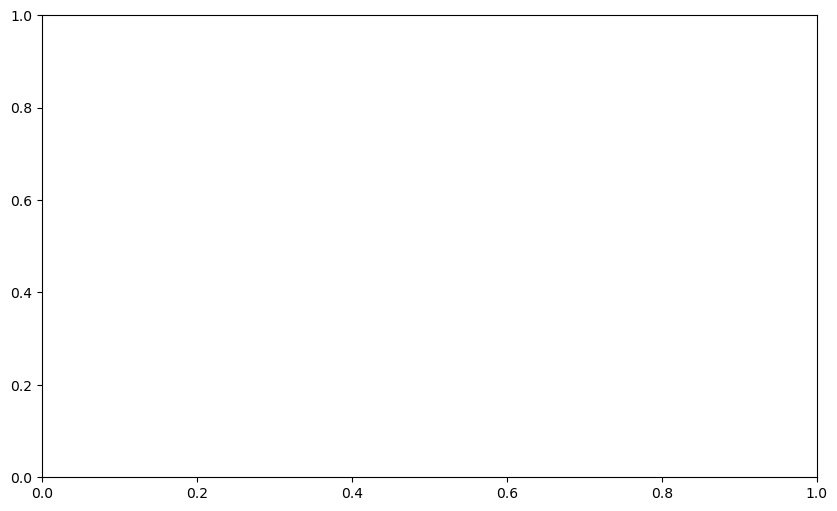

In [22]:
import matplotlib.pyplot as plt


def create_city_map(df):
    Lat_min, Lat_max = df['Lat'].min(), df['Lat'].max()
    Lng_min, Lng_max = df['Lng'].min(), df['Lng'].max()


fig, ax = plt.subplots(figsize=(10,6))

#Create the plot for each city with the hotel name and country

plt.scatter(create_city_map(df)['Lng'], create_city_map(df)['Lat'], marker = 'o', s=create_city_map(df)['Humidity']*0.5, color='blue', alpha=0.7, edgecolors='black',linewidth=1)

for index, row in df.iterrows():
        City = row['City']
        Country = row['Country']
        hotel_name = row['Hotel Name']
        Lat = row['Lat']
        Lng = row['Lng']
        Humidity = row['Humidity']

plt.text(Lng, Lat, f"{City}, {Country}\nHotel: {hotel_name}\nHumidity: {Humidity}%", fontsize=8, ha='right')

plt.xlim(lon_min - 2, lon_max + 2)
plt.ylim(lat_min - 2, lat_max + 2)

#Set Labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#Title of Map
plt.title('City Map with Hotel Information')

#Show the plot
plt.show()

create_city_map (hotel_df)